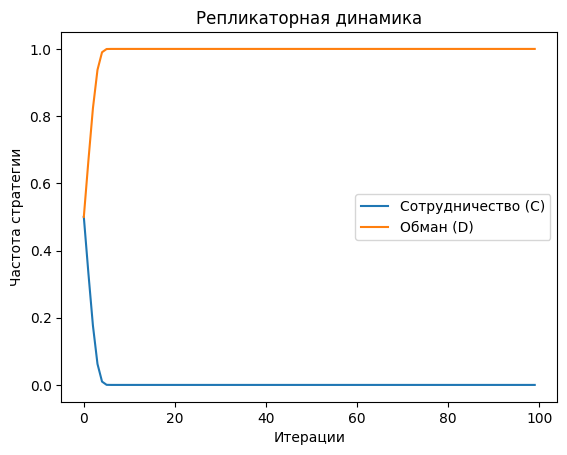

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определение матрицы выплат
payoff_matrix = np.array([
    [3, 0],  # Выплаты для стратегии C
    [5, 1]   # Выплаты для стратегии D
])

# Начальные частоты стратегий
initial_frequencies = np.array([0.5, 0.5])  # 50% C и 50% D

# Количество итераций
num_iterations = 100

# Массивы для хранения частот стратегий на каждом шаге
frequencies_history = np.zeros((num_iterations, 2))
frequencies_history[0] = initial_frequencies

# Репликаторная динамика
for t in range(1, num_iterations):
    # Текущие частоты стратегий
    frequencies = frequencies_history[t-1]

    # Вычисление средней приспособленности для каждой стратегии
    average_fitness = np.dot(payoff_matrix, frequencies)

    # Вычисление средней приспособленности популяции
    population_fitness = np.dot(frequencies, average_fitness)

    # Обновление частот стратегий
    new_frequencies = frequencies * average_fitness / population_fitness

    # Нормализация частот
    new_frequencies /= np.sum(new_frequencies)

    # Сохранение новых частот
    frequencies_history[t] = new_frequencies

# Визуализация изменения частот стратегий со временем
plt.plot(frequencies_history[:, 0], label='Сотрудничество (C)')
plt.plot(frequencies_history[:, 1], label='Обман (D)')
plt.xlabel('Итерации')
plt.ylabel('Частота стратегии')
plt.title('Репликаторная динамика')
plt.legend()
plt.show()